In [1]:
import numpy as np
import scipy.stats
import random
import matplotlib.pyplot as plt
import sys
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score

# Question 1

In [2]:
def gen_class_samples(num_samples,class_labels):
    class_dist = np.random.randint(0,len(class_labels),size=num_samples)
    class_samples = [np.sum(class_dist==class_label) for class_label in class_labels]
    return class_samples

def split_data(data_wt_labels,labels):
    the_samples = []
    for label in labels:
        class_ids = np.where(data_wt_labels[-1,:]==label)[0]
        cls_samples = data_wt_labels[:,class_ids]
        the_samples.append(cls_samples)
    return the_samples

def plot_decision(data_wt_labels,correct_ids,incorrect_ids):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    markers = ['o', 'v', 's', 'P']
    z = [0,1,2]
    for i in class_labels:
        ax.scatter(data[0, correct_ids[i]], data[1, correct_ids[i]], data[2, correct_ids[i]], s=5, color = 'green', \
                   label = 'correct class' + str(i), marker=markers[i])
        ax.scatter(data[0, incorrect_ids[i]], data[1, incorrect_ids[i]], data[2, incorrect_ids[i]], s=5, color = 'red', \
                   label = 'incorrect class' + str(i), marker=markers[i])
        ax.set_title('MAP classification Results')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.legend()
        plt.show()

dims = 3
class_labels = [0,1,2,3] #label_ids
priors = [0.25]*4
losses = np.ones((len(class_labels),len(class_labels))) - np.eye(len(class_labels))



For generating the data, we use

$m_1 = \begin{bmatrix}9.75 \\ 0 \\ 0\end{bmatrix}$
$m_2 = \begin{bmatrix}7.5 \\ 0 \\ 9\end{bmatrix}$
$m_3 = \begin{bmatrix}0 \\ 7.5 \\ 9\end{bmatrix}$
$m_4 = \begin{bmatrix}8.25 \\ 9 \\ 7.5\end{bmatrix}$ \\

$C_1 = \begin{bmatrix}10 & 0 & 0 \\ 0 & 40 & 0 \\ 0 & 0 & 15\end{bmatrix}$
$C_2 = \begin{bmatrix}20 & 0 & 0 \\ 0 & 5 & 0 \\ 0 & 0 & 10\end{bmatrix}$
$C_3 = \begin{bmatrix}20 & 0 & 0 \\ 0 & 10 & 0 \\ 0 & 0 & 40\end{bmatrix}$
$C_4 = \begin{bmatrix}5 & 0 & 0 \\ 0 & 20 & 0 \\ 0 & 0 & 5\end{bmatrix}$




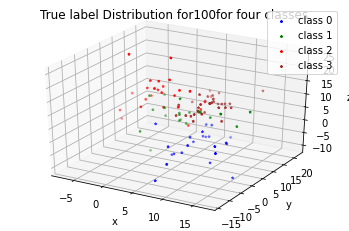

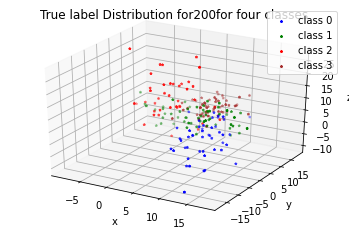

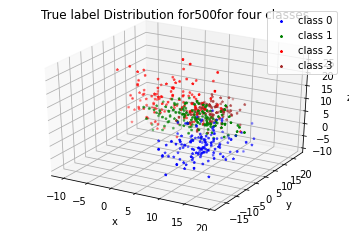

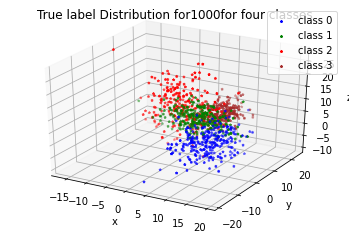

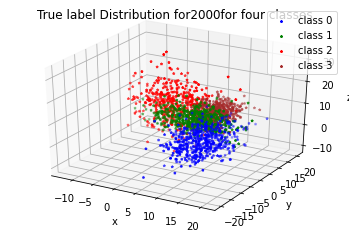

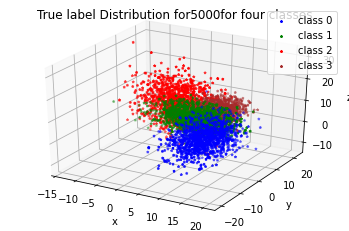

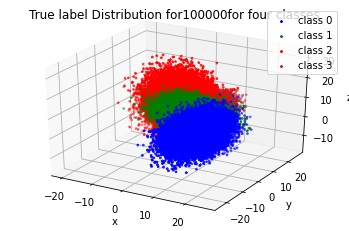

In [3]:
m0 = np.array([9.75, 0, 0])
m1 = np.array([7.5, 0, 9.0])
m2 = np.array([0, 7.5, 9.0])
m3 = np.array([8.25, 9, 7.5])
means = [m0, m1, m2, m3]

C0 = np.array([[10, 0, 0], [0, 40, 0], [0, 0, 15]])
C1 = np.array([[20, 0, 0], [0, 5, 0], [0, 0, 10]])
C2 = np.array([[20, 0, 0], [0, 10, 0], [0, 0, 40]])
C3 = np.array([[5, 0, 0], [0, 20, 0], [0, 0, 5]])
covs = [C0, C1, C2, C3]

#D100 = []
#D100 = []
#D200 = []
#D500 = []
#D1k = []
#D2k = []
#D5k = []
#D100k = []

sample_sizes = {
    'D100': [[100], [], []],\
    'D200': [[200], [], []],\
    'D500': [[500], [], []],\
    'D1k': [[1000], [], []],\
    'D2k': [[2000], [], []],\
    'D5k': [[5000], [], []],\
    'D100k': [[100000], [], []],\
}

for i,key in enumerate(sample_sizes):
    sample_type = sample_sizes[key]
    num_points = int(sample_type[0][0])
    class_samples = gen_class_samples(num_points,class_labels)
    sample_type[1] = class_samples
    pts_all_classes = np.array([],dtype=float).reshape(dims,0)
    labels = []
    for class_label in class_labels:
        num_label = class_samples[class_label]
        mean = means[class_label]
        cov = covs[class_label]
        pts = np.random.multivariate_normal(mean,cov,num_label).T
        pts_all_classes = np.concatenate((pts_all_classes,pts),axis=1)
        class_label_id = [class_label]*num_label
        labels += class_label_id
    labels = np.array(labels).reshape((1,-1))
    sample_type[2] = np.concatenate((pts_all_classes,labels),axis=0)
    tname = "True label Distribution for"+str(num_points)+"for four classes"
    xname = "x"
    yname = "y"
    zname = "z"
    plt_pts = split_data(sample_type[2],class_labels)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    colors = ['blue','green','red','brown'] #[0,1,2,3]

    for class_id,pt in enumerate(plt_pts):
        ax.scatter(pt[0, :], pt[1, :], pt[2, :], s=5, color = colors[class_id], label = 'class ' + str(class_id), marker='*')

    ax.set_title(tname)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_zlabel(zname)
    plt.legend()
    plt.show()    

### Theoretical Optimal Classifier
For this the sample type of 100,000 data points was used
Decision Rule that achieves the minimum probability of error,
$D(x) = argmin \sum_{d,l=1}^{3} λ_{dl} p(L=l|x)$

$λ_{dl}$ is the loss for classifying a point from label l in class d.

$$p(L=l|x) = \frac{p(x|L=l)p(L=1)}{p(x)}$$
$$p(x) = \sum_{j=1}^{C} p(x|L=j)p(L=j)$$

The cost function(losses) used in the classification as declared above is

$$λ = \begin{bmatrix}0 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 1 & 0\end{bmatrix}$$

The minimum probability of error as found below is: 0.1399

In [5]:
#calc_theoretical_classifier(sample_sizes['D100k'])
D100k = sample_sizes['D100k']
num_samples = D100k[0][0]
cls_samples = D100k[1]
data_wt_labels = D100k[2]
data = data_wt_labels[:3,:].T #(N, 3)
labels = data_wt_labels[3,:]
eval_pxgls = np.zeros((len(class_labels), num_samples), dtype=float) ##(4, N)

for i in class_labels:
    eval_pxgl = scipy.stats.multivariate_normal.pdf(data, mean=means[i], cov=covs[i])
    eval_pxgls[i] = eval_pxgl

priors_np = np.array(priors)
px = np.matmul(priors_np.reshape(1,-1), eval_pxgls) ##(1, N)

stack_px = np.zeros((len(class_labels), num_samples), dtype=float)
for class_label in class_labels:
    stack_px[class_label] = px

plgx = priors_np.reshape(-1, 1)*eval_pxgls/stack_px ## class posterior(4, N)
risks = np.matmul(losses, plgx)

decisions = np.argmin(risks, axis=0)
correct_ids = []
incorrect_ids = []

for class_label in class_labels:
    label_pids = (labels == class_label)
    correct_cls_bool = ((label_pids)*(decisions == class_label)).astype('int')
    incorrect_cls_bool = ((label_pids)*(decisions != class_label)).astype('int')
    correct_class_ids = np.where(correct_cls_bool == 1)[0]
    incorrect_class_ids = np.where(incorrect_cls_bool == 1)[0]
    correct_ids.append(correct_class_ids)
    incorrect_ids.append(incorrect_class_ids)

prob_error = 1.0*np.sum((decisions != labels).astype('int'))/num_samples
prob_error = np.round(prob_error, 4)

print('prob_error:',prob_error)


prob_error: 0.1399


### MLP Model Order Selection
A 10-fold cross validation was performed to find the optimum number of perceptrons for each of the above mentioned data samples.

In [14]:
def calc_pe(label,prediction):
    num_samples = label.shape[0]
    acc = np.sum((label == prediction).astype('int'))/num_samples
    error = 1 - acc
    return error

def validate(sample_type, model):
    num_samples = sample_type[0][0]
    cls_samples = sample_type[1]
    data_wt_labels = sample_type[2]
    data = data_wt_labels[:3,:].T #(N, 3)
    labels = data_wt_labels[3,:].T
    prediction = model.predict(data, workers=4, use_multiprocessing = True)
    prediction = np.argmax(prediction, axis=1) 
    err = calc_pe(labels, prediction)
    return err

def get_model(first_num_nodes,num_labels): 
    model = Sequential()
    # first layer
    fc1_act = Dense(units = first_num_nodes, kernel_initializer = 'random_uniform', activation = 'elu')
    model.add(fc1_act)
    # Second layer
    fc2_act = Dense(units = num_labels, kernel_initializer = 'random_uniform', activation = 'softmax')
    model.add(fc2_act)
    model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

def MOS(sample_type, kfold, num_perc_lst,num_labels):
    num_samples = sample_type[0][0]
    cls_samples = sample_type[1]
    data_wt_labels = sample_type[2]
    data_wt_labels = data_wt_labels[:, np.random.permutation(data_wt_labels.shape[1])]#shuffle
    data = data_wt_labels[:3,:].T #(N, 3)
    labels = data_wt_labels[3,:].T
    data = data.reshape((kfold, -1, 3))
    labels = labels.reshape((kfold, -1))
    num_val = num_samples/kfold
    num_train = num_samples - num_val
    perc_lst = []
    for num_perc in num_perc_lst:
        err_lst = []
        for val_idx in range(kfold):
            # train
            train_data = np.concatenate((data[0:val_idx], data[val_idx+1:]), axis=0)
            train_labels = np.concatenate((labels[0:val_idx], labels[val_idx+1:]), axis=0)
            # val
            val_data = data[val_idx].reshape((1, -1, 3))
            val_labels = labels[val_idx]
            '''
            #data shape summary
            print('train data shape ',train_data.shape)
            print('train label shape ',train_labels.shape)
            print('val data shape ',val_data.shape)
            print('val labels shape ',val_labels.shape)
            '''
            #get model
            model = get_model(num_perc,num_labels)
            # train
            model.fit(train_data, train_labels, batch_size = 10, epochs = 100, verbose=0)
            # validate
            val_pred = model.predict(val_data) 
            val_pred = np.argmax(val_pred, axis=2)
            val_pred = np.squeeze(val_pred, axis=0)
            err = calc_pe(val_labels, val_pred)
            #print('num_samples:', num_samples,' num_perc: ',num_perc,' val idx: ', val_idx, ' error: ', np.round(err, 4))
            err_lst.append(err)

        mean_err = np.mean(np.array(err_lst))
        std_err = np.std(np.array(err_lst))
        #print('num_samples:', num_samples, ' num_perc: ',num_perc,' mean error: ', \
        #np.round(mean_err, 4), ' std error: ',np.round(std_err, 4))
        perc_lst.append(mean_err)  

    perc_lst = np.array(perc_lst)
    print('pe for each perceptron: ', perc_lst)
    desired_num_perc = num_perc_lst[np.argmin(perc_lst)]
    return desired_num_perc      
    

def train_kfoldMLP(train_sample_type, val_sample_type, kfold, num_perc_lst,num_train,num_labels):
    num_samples = train_sample_type[0][0]
    cls_samples = train_sample_type[1]
    data_wt_labels = train_sample_type[2]
    data_wt_labels = data_wt_labels[:, np.random.permutation(data_wt_labels.shape[1])]
    data = data_wt_labels[:3,:].T #(N, 3)
    labels = data_wt_labels[3,:].T
    #Model Order Selection
    desired_num_perc = MOS(train_sample_type, kfold, num_perc_lst,num_labels)

    for num in range(num_train):
        print('Train:', num_samples)
        #get model
        model = get_model(desired_num_perc,num_labels)
        #train
        model.fit(data, labels, batch_size = 10, epochs = 100, verbose=1)
        #print('Model Summary:')
        #print(model.summary())

        #validate
        val_err = validate(val_sample_type,model)
        #print('num_samples: ',num_samples,' desired_num_perc: ',desired_num_perc,' val_err: ', val_err)

In [ ]:
num_perceptron_lst = [1, 2, 4, 8, 16, 25, 35, 50]
fold = 10
num_train = 10
#training the MLP
for i,key in enumerate(list(sample_sizes.keys())[:-1]):
    train_kfoldMLP(sample_sizes[key],sample_sizes['D100k'],fold,num_perceptron_lst,num_train,len(class_labels))

Streaming output truncated to the last 5000 lines.
50/50 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.8180
Epoch 15/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.8180
Epoch 16/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.8140
Epoch 17/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.8240
Epoch 18/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.8320
Epoch 19/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.8320
Epoch 20/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8180
Epoch 21/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.8280
Epoch 22/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.8220
Epoch 23/100
50/50 [==============================] - 0s 2ms/s

Using model order selection, the number of perceptrons in the first layer which provides minimum probability of error was identified for each dataset. Using this optimal number of perceptrons, MLP was trained for each dataset and validated on the test dataset containing 100, 000 samples.

To mitigate the chances of getting stuck at a local optimum, MLP for each dataset was trained 10 times with an optimal number of perceptrons in the first layer of the MLP, each time randomly initializing the weights of the MLP layers. For each dataset, trained MLP which provides minimum cross entropy loss (highest training data log-likelihood) across 10 experiments was used to validate on the test data.

### Observations
1. Then error reduces as we increase the number of perceptrons, but the error reduction from 35 to 50 is very less
2. 